 # MAKING PRICE PREDICTION OF A HOUSE

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing dataset from Skilearn and reading as a dataframe

In [35]:
from sklearn.datasets import load_boston
boston = load_boston()

### Retrieving details and information about the housing dataset

In [36]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Printing column names

In [37]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Converting boston housing data into a dataframe

In [38]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

### Printing the first 10 rows

In [39]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [40]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

#### Adding the 'MEDV' feature which gives the Median value of owner-occupied homes in $1000's. It is the target in the dataframe but found missing in the above output

In [41]:
df['MEDV'] = boston.target

### Printing 10 rows with the added feature

In [42]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [43]:
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


# Checking for quality of data

#### 1. Checking for null values or missing values and the data types for each colummn in the dataset

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### 2. Decribing the dataset by knowing the mean, standard deviation, minimum value and maximum value

In [45]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Visualisation Process

#### The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. A graph showing the relationships between each of the numerical features by pairing each feature with all other features.

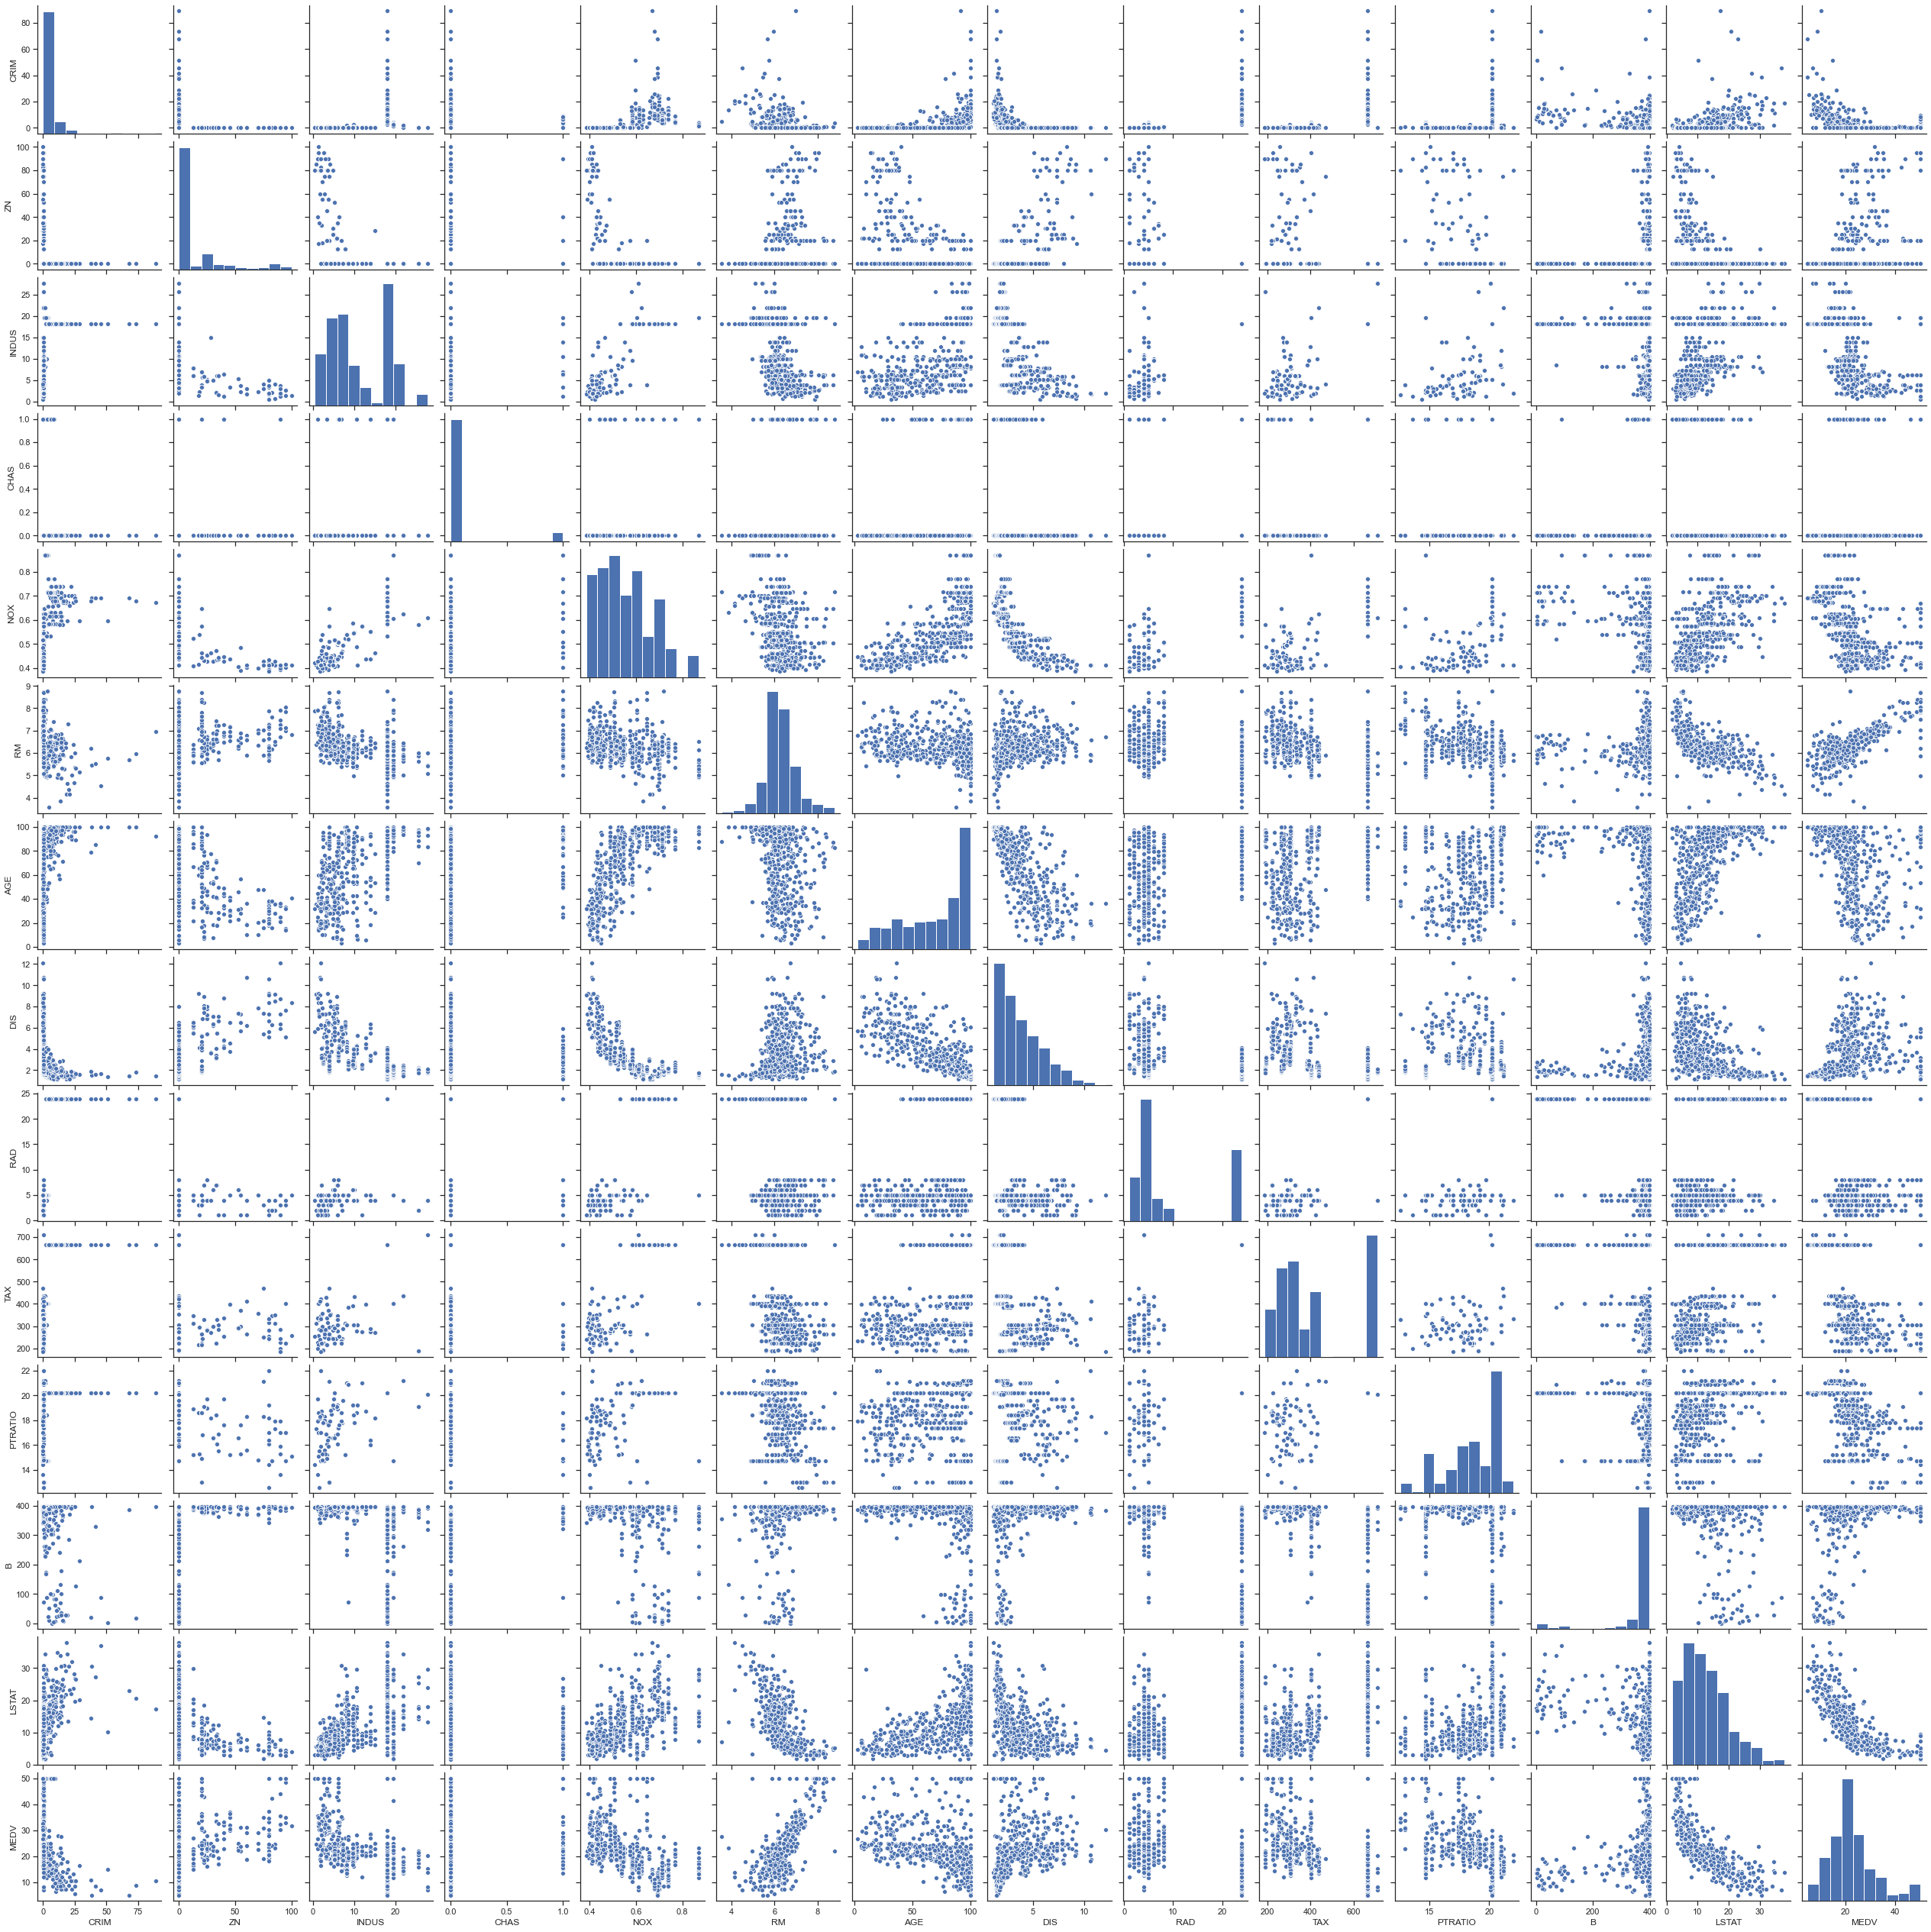

In [46]:
sns.pairplot(df)
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
plt.show()

#### This warning library suppresses user warnings that comes with the plot library

In [47]:
import warnings
warnings.filterwarnings("ignore")

#### Plotting a tight layout to adjust subplot params for the column features so that the subplot(s) fits in to the figure area

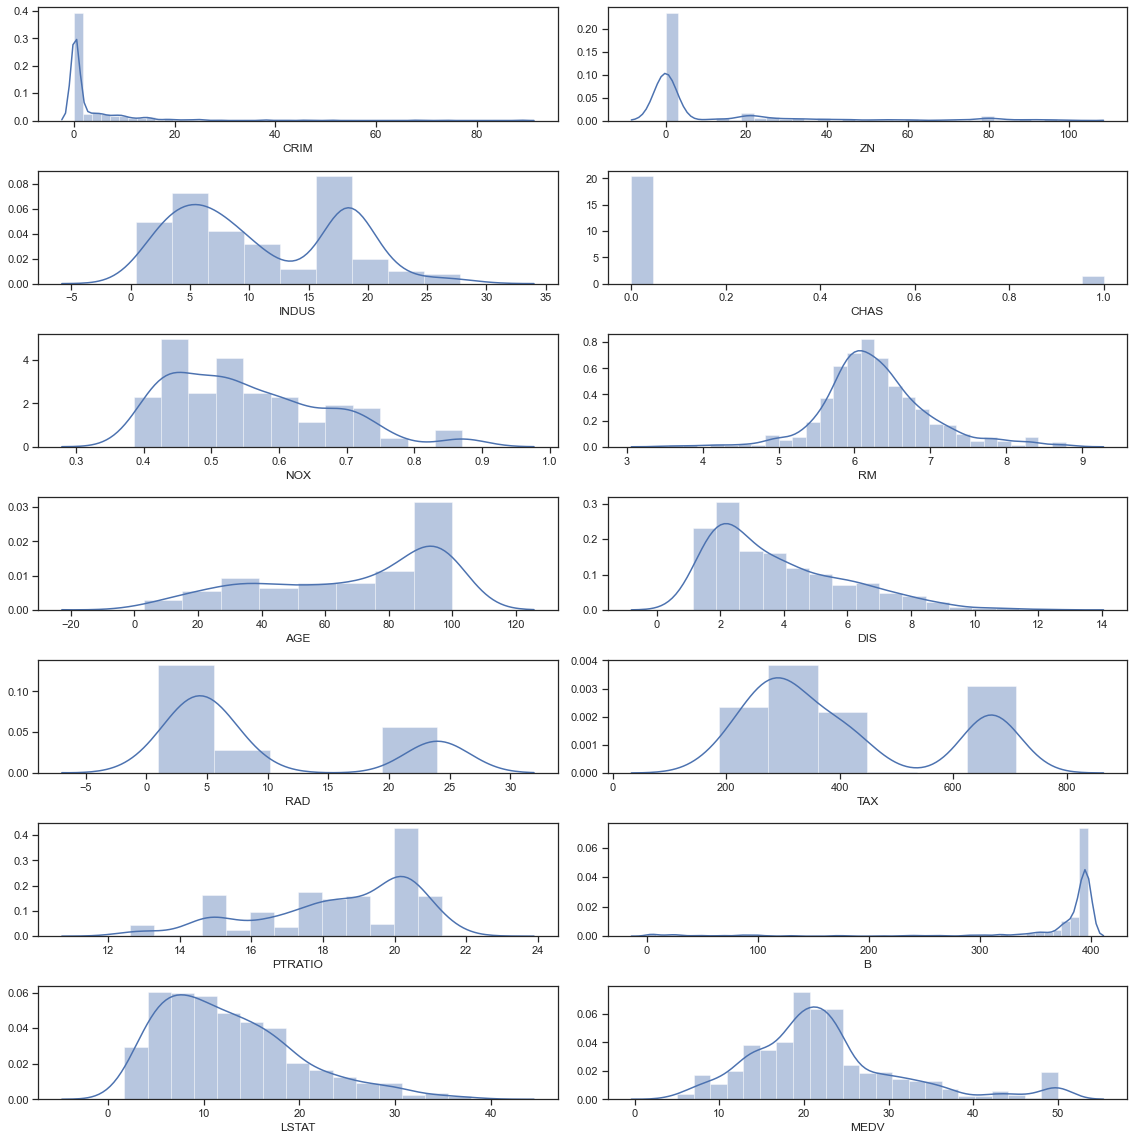

In [50]:
rows = 7
cols = 2
fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize = (16,16))

col = df.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j])
        index = index + 1

plt.tight_layout()

### Checking for correlation between the various variables or features and giving a summary of the relationships between them.
#### Note: A correlation factor of 1, means a positve correlation which indicates that as one variable goes up, the other also increases; -1 means a negative correlation meaning that as one variable increases, the other variable decreases; 0 correlation factor means there is no linear  linear relationship between the movement of the two variables..

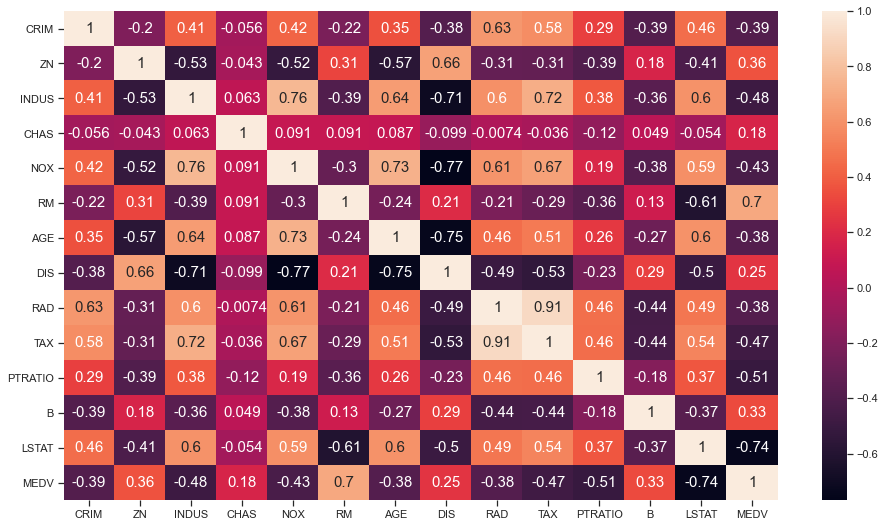

In [57]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.heatmap(df.corr(), annot = True, annot_kws={'size': 15})

### Defining a function to filter the variables correlating with the target; that is the 'MEDV' from above diagram at a particular threshold

In [60]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
        
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

#### Retrieving variables correlating with 'MEDV' above a threashold of 0.4

In [61]:
threshold = 0.4
corr_value = getCorrelatedFeature(df.corr()['MEDV'], threshold)

#### Printing out variables

In [62]:
corr_value.index.values

array(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype=object)

#### Generating the entities for the variables retrieved from the genaral dataset

In [66]:
correlated_data = df[corr_value.index]
correlated_data.head(10)

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2
5,2.18,0.458,6.430,222.0,18.7,5.21,28.7
6,7.87,0.524,6.012,311.0,15.2,12.43,22.9
7,7.87,0.524,6.172,311.0,15.2,19.15,27.1
8,7.87,0.524,5.631,311.0,15.2,29.93,16.5
9,7.87,0.524,6.004,311.0,15.2,17.10,18.9


## Regression Analysis

#### Generating the x and y axis for the linear regression plot. As well as dropping the 'MEDV' variable from the generated array which will be on the x-axis (independent variables) since 'MEDV' is the dependent variable.

In [112]:
X = correlated_data.drop(labels=['MEDV'], axis = 1)
y = correlated_data['MEDV']

#### Splitting the given data into a training and testing dataset

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1)

In [138]:
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

X_train:       INDUS    NOX     RM    TAX  PTRATIO  LSTAT
378  18.10  0.671  6.380  666.0     20.2  23.69
127  21.89  0.624  5.693  437.0     21.2  17.19
82    4.86  0.426  6.302  281.0     19.0   6.72
463  18.10  0.713  6.513  666.0     20.2  10.29
207  10.59  0.489  5.783  277.0     18.6  18.06
..     ...    ...    ...    ...      ...    ...
255   3.64  0.392  5.876  315.0     16.4   9.25
72   10.81  0.413  6.065  305.0     19.2   5.52
396  18.10  0.693  6.405  666.0     20.2  19.37
235   6.20  0.507  6.086  307.0     17.4  10.88
37    5.96  0.499  5.850  279.0     19.2   8.77

[339 rows x 6 columns]
y_train:  378    13.1
127    16.2
82     24.8
463    20.2
207    22.5
       ... 
255    20.9
72     22.8
396    12.5
235    24.0
37     21.0
Name: MEDV, Length: 339, dtype: float64
X_test:       INDUS    NOX     RM    TAX  PTRATIO  LSTAT
307   2.18  0.472  6.849  222.0     18.4   7.53
343   3.78  0.484  6.696  370.0     17.6   7.18
47    6.91  0.448  6.030  233.0     17.9  18.80
67    6

In [139]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

#### Training model using dataset

In [140]:
lm.fit(X_train,y_train)

LinearRegression()

#### Testing model using dataset

In [141]:
predictions = lm.predict(X_test)

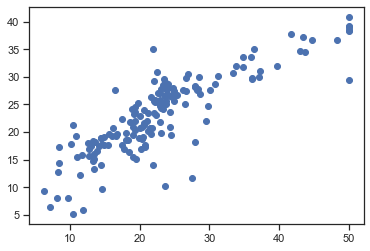

In [142]:
plt.scatter(y_test,predictions)

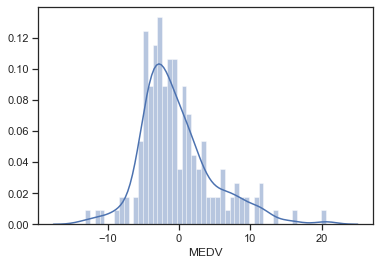

In [143]:
sns.distplot((y_test-predictions),bins=50)

#### Intercept on the y-axis of the linear function

In [144]:
lm.intercept_

23.49923705354484

#### Coefficients or gradients of the linear regression function

In [145]:
lm.coef_

array([ 1.08016127e-01, -7.91996313e+00,  4.30011673e+00, -2.02636592e-04,
       -9.66142294e-01, -5.36384366e-01])

#### Defining the linear regression funcion

In [180]:
def lin_func(values, coefficients=lm.coef_, y_axis=lm.intercept_):
    return np.dot(values, coefficients) + y_axis

#### Defining random test data and make some samples

In [195]:
from random import randint
for i in range(5):
    index = randint(0,len(df)-1)
    sample = df.iloc[index][corr_value.index.values].drop('MEDV')
    print(
           'PREDICTION: ', round(lin_func(sample),2),
           ' // REAL: ',df.iloc[index]['MEDV'],
           ' // DIFFERENCE: ', round(round(lin_func(sample),2) - df.iloc[index]['MEDV'],2)
)

PREDICTION:  25.13  // REAL:  21.6  // DIFFERENCE:  3.53
PREDICTION:  18.44  // REAL:  13.1  // DIFFERENCE:  5.34
PREDICTION:  19.7  // REAL:  18.8  // DIFFERENCE:  0.9
PREDICTION:  27.53  // REAL:  27.5  // DIFFERENCE:  0.03
PREDICTION:  32.36  // REAL:  31.7  // DIFFERENCE:  0.66
